<center> <h1> Change Points detection on flu signals  </h1> </center>

In [11]:
#Importing Libraries

import os
import pandas as pd
import numpy as np
import pygsp
from scipy import signal
from pygsp import graphs, filters, plotting
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from math import *
from datetime import time
from IPython.html.widgets import *
import ruptures as rpt

In [12]:
flu_national=pd.read_csv("/Users/aaronmamann/Desktop/epidemics/data/incidence-Grippaux_France.csv",index_col=["week","geo_name"])

In [13]:
flu_national.to_csv(r'/Users/aaronmamann/Desktop/epidemics/data/modif-279-incidence-Grippaux_France.csv')

<center> <h1> Détection de ruptures avec le package Ruptures  </h1> </center>

## Change points detection on the univariate signal (rate of new flu infections for 100 000 hab in France)

In [14]:
#Sorting observations in the database
flu_national=flu_national.sort_values(by='week', ascending=True)

In [15]:
flu_national

,,indicator,inc,inc_low,inc_up,inc100,inc100_low,inc100_up,geo_insee
week,geo_name,,,,,,,,
198444,France,3,68422,20056.0,116788.0,125,37.0,213.0,FR
198445,France,3,135223,101414.0,169032.0,246,184.0,308.0,FR
198446,France,3,87330,67686.0,106974.0,159,123.0,195.0,FR
198447,France,3,72029,54274.0,89784.0,131,99.0,163.0,FR
198448,France,3,78620,60634.0,96606.0,143,110.0,176.0,FR
198449,France,3,101073,81684.0,120462.0,184,149.0,219.0,FR
198450,France,3,123680,101401.0,145959.0,225,184.0,266.0,FR
198451,France,3,101726,80242.0,123210.0,185,146.0,224.0,FR
198452,France,3,84830,60602.0,109058.0,154,110.0,198.0,FR


In [25]:
# Change points detection with median models and with the L1 norm cost function 
# Here we set the number K of change points we want : K=72 
algo2 = rpt.Dynp(model="l1").fit(np.array(flu_national['inc100']))
result2 = algo2.predict(n_bkps=72)
rpt.display(np.array(flu_national['inc100']), result2, figsize=(20, 8))
plt.show()

In [7]:
# Change points detection with the "L1 norm" cost function 
# Here the number K of change points is unknown, so we use a penalisation to choose the right number of change points
algo6 = rpt.Pelt(model="l1").fit(np.array(flu_national['inc100'][0:400]))
result6 = algo6.predict(pen=900)
rpt.display(np.array(flu_national['inc100'][0:400]), result6, figsize=(20, 8))
plt.show()

In [155]:
# Change points detection with the "L2 norm" cost function 
algo7 = rpt.Pelt(model="l2").fit(np.array(flu_national['inc100']))
result7 = algo7.predict(pen=200050)
rpt.display(np.array(flu_national['inc100']), result7, figsize=(20, 8))
plt.show()

In [46]:
# Change points detection with the "autoregressive" cost function  
algo8 = rpt.Pelt(model="ar", params={"order": 5}).fit(np.array(flu_national['inc100'])[100:500])
result8 = algo8.predict(pen=2000)
rpt.display(np.array(flu_national['inc100'])[100:500], result8, figsize=(20, 8))
plt.show()

In [88]:
# Change points detection with the "Kernelized Mean Change" cost function   
algo11 = rpt.Pelt(model="rbf").fit(np.array(flu_national['inc100']))
result11 = algo11.predict(pen=3.5)
rpt.display(np.array(flu_national['inc100']), result11, figsize=(20, 8))
plt.show()

## Change points detection on the multivariate signal (rate of new flu infections for 100 000 hab in the 22 french regions)

In [91]:
flu_regional=pd.read_csv("/Users/aaronmamann/Desktop/epidemics/data/incidence-Grippaux_Regions.csv")

In [92]:
flu_regional

,week,indicator,inc,inc_low,inc_up,inc100,inc100_low,inc100_up,geo_insee,geo_name
0,202011,3,4636,2208.0,7064.0,242,116.0,368.0,42,ALSACE
1,202011,3,5801,3322.0,8280.0,166,95.0,237.0,72,AQUITAINE
2,202011,3,630,338.0,922.0,45,24.0,66.0,83,AUVERGNE
3,202011,3,1408,611.0,2205.0,93,40.0,146.0,25,BASSE-NORMANDIE
4,202011,3,1838,432.0,3244.0,110,26.0,194.0,26,BOURGOGNE
5,202011,3,6506,4705.0,8307.0,191,138.0,244.0,53,BRETAGNE
6,202011,3,4850,3632.0,6068.0,184,138.0,230.0,24,CENTRE
7,202011,3,2065,1207.0,2923.0,152,89.0,215.0,21,CHAMPAGNE-ARDENNE
8,202011,3,463,168.0,758.0,136,49.0,223.0,94,CORSE
9,202011,3,2387,614.0,4160.0,197,51.0,343.0,43,FRANCHE-COMTE


In [10]:
#Detecting the observations which have different lengths
#Here each observation has normally to have 22 coordinates for the new flu infections in the 22 regions
a=23
for year in range (198500,202000,100) :
    for t in range (1,53) : 
        if len(flu_regional['inc100'][year+t].to_numpy())<23 :
            a=len(flu_regional['inc100'][year+t].to_numpy())
            print(year+t)

201252


In [93]:
#Database without the new infections in "OUTRE MER"
flu_regional_met=flu_regional.loc[flu_regional['geo_name'] != 'OUTRE-MER']

In [94]:
#Setting as index the variable week
flu_regional_met=flu_regional_met.set_index(['week'])

In [95]:
flu_regional_met

,indicator,inc,inc_low,inc_up,inc100,inc100_low,inc100_up,geo_insee,geo_name
week,,,,,,,,,
202011,3,4636,2208.0,7064.0,242,116.0,368.0,42,ALSACE
202011,3,5801,3322.0,8280.0,166,95.0,237.0,72,AQUITAINE
202011,3,630,338.0,922.0,45,24.0,66.0,83,AUVERGNE
202011,3,1408,611.0,2205.0,93,40.0,146.0,25,BASSE-NORMANDIE
202011,3,1838,432.0,3244.0,110,26.0,194.0,26,BOURGOGNE
202011,3,6506,4705.0,8307.0,191,138.0,244.0,53,BRETAGNE
202011,3,4850,3632.0,6068.0,184,138.0,230.0,24,CENTRE
202011,3,2065,1207.0,2923.0,152,89.0,215.0,21,CHAMPAGNE-ARDENNE
202011,3,463,168.0,758.0,136,49.0,223.0,94,CORSE


In [96]:
#Transform the signal so that the "Ruptures" package understands it
flu_regional_final=np.zeros((1820,22))
i=0
absc=np.zeros(1820)
for year in range (198500,202000,100) :
    for t in range (1,53) :
        flu_regional_final[i]=flu_regional_met['inc100'][year+t].to_numpy()
        absc[i]=int(year+t)
        i=i+1

In [97]:
#The signal that we will be used for the "Ruptures" package 
#Each row is a vector which is the number of new infections for each of the 22 regions 
flu_regional_final

array([[ 95.,  98.,  93., ..., 159.,  40., 202.],
       [103., 299., 151., ..., 120., 178., 328.],
       [121., 343., 469., ..., 159., 539., 206.],
       ...,
       [ 40.,  45.,  15., ...,  96.,  54.,  46.],
       [ 36.,  73.,   8., ...,  92.,  50.,  32.],
       [ 12.,  69.,   8., ...,  75.,  70.,  50.]])

In [99]:
algo13R = rpt.Pelt(model="rbf").fit(flu_regional_final)
result13R = algo13R.predict(pen=3)
rpt.display(flu_regional_final, result13R, figsize=(20, 50))
plt.show()

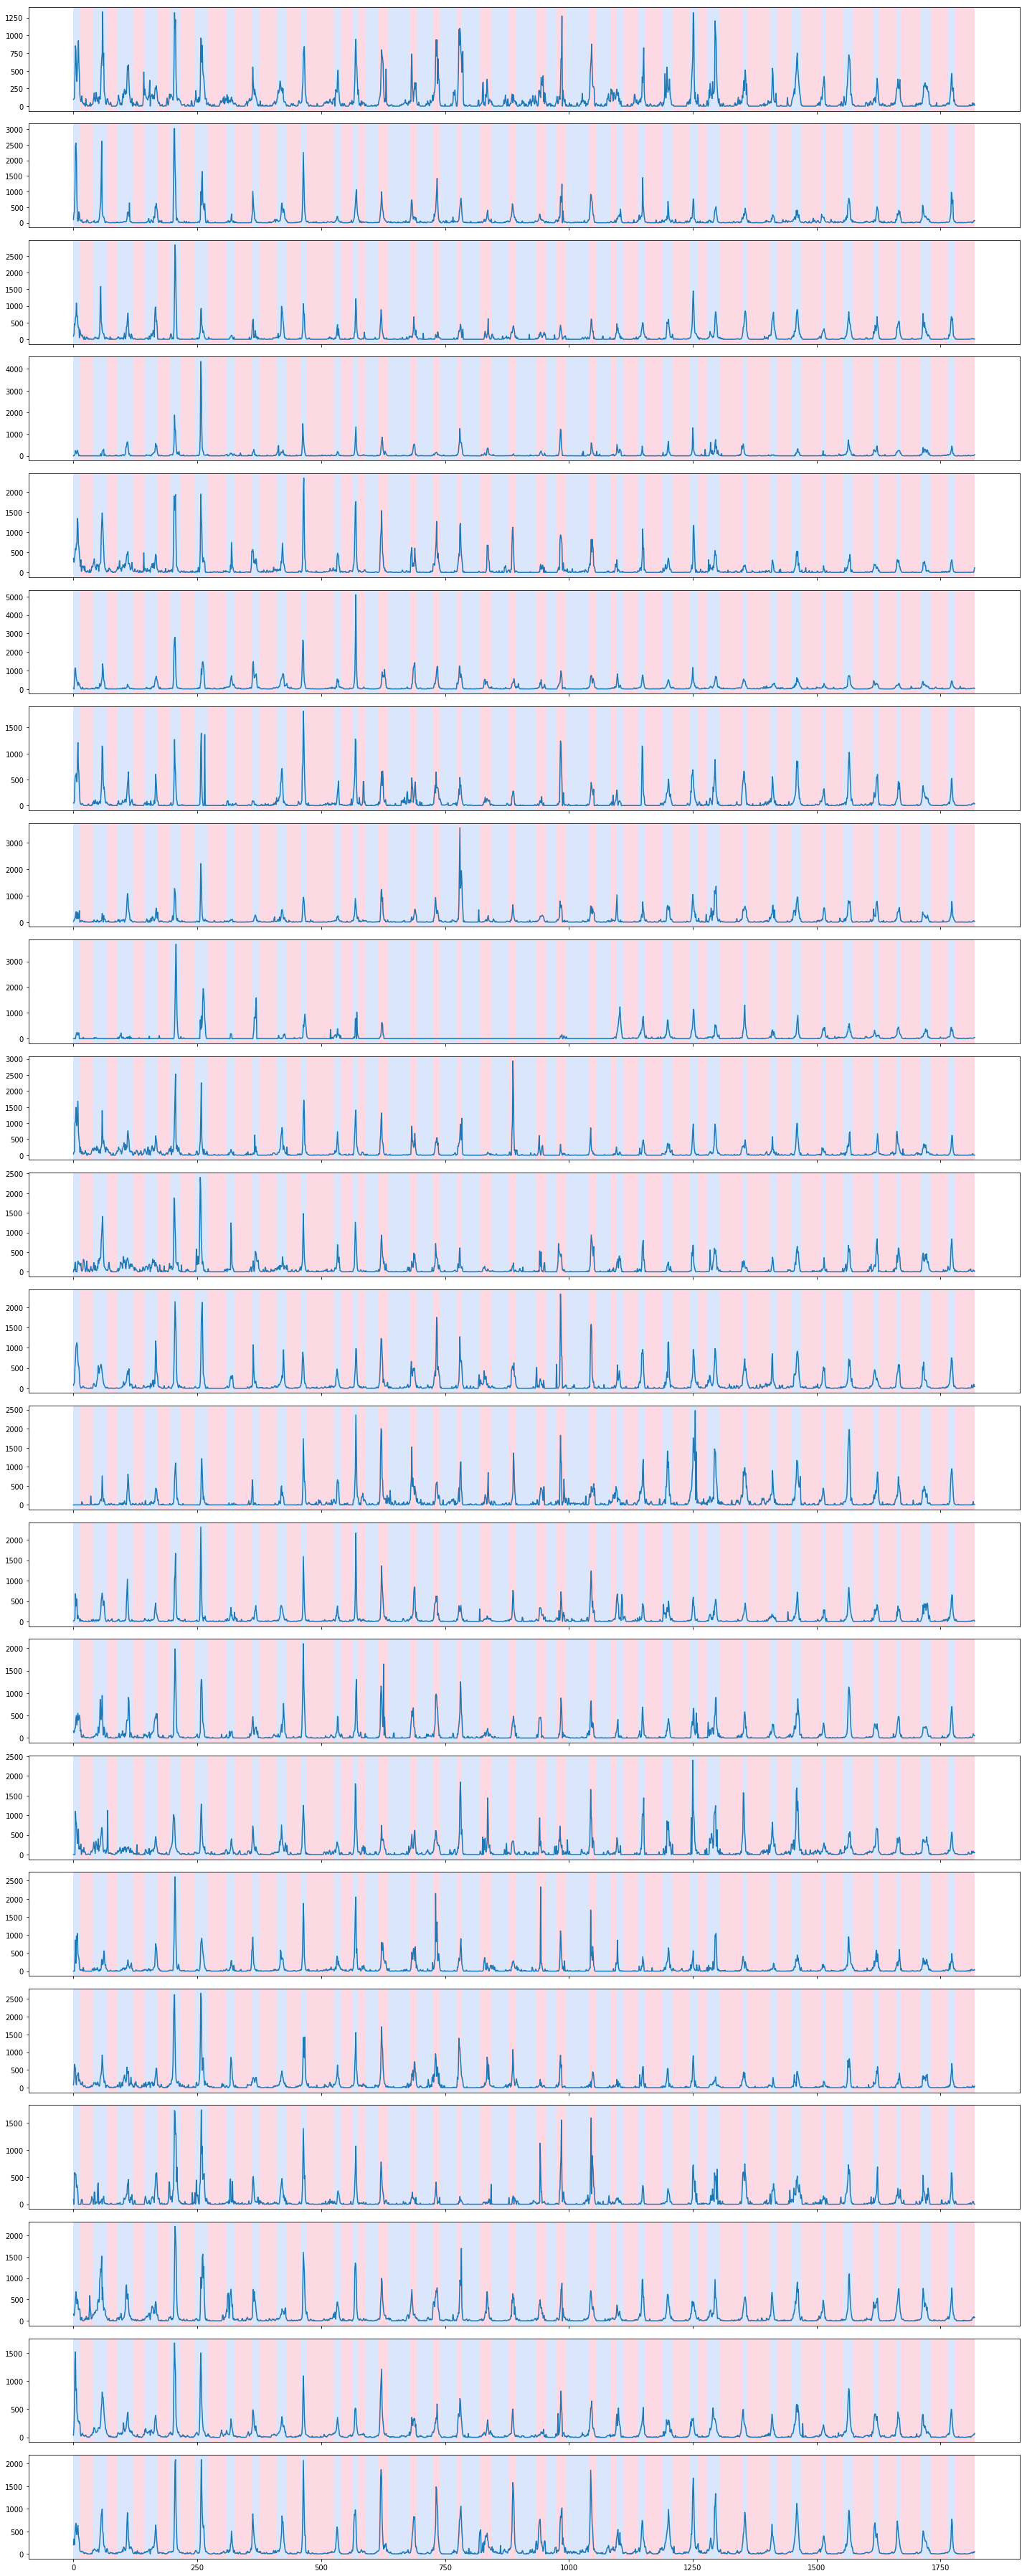

In [106]:
# Bijection from 1,2,...,1820 to 1985/01,...,2019/52, where 2019/52 is the 52th week of 2019 
# and where 1985/01 is the 1st week of 1985

def final_change_point (result_rupture):
    
    change_points=np.zeros(len(result_rupture)-1)
    for i in range (0,len(result_rupture)-1) : 
        change_points[i]=bijection_change_point(result_rupture[i])
    
    return change_points
        

In [107]:
#With the bijection function we can now have the change point in the format yearweek 
#for instance 198736 means 1987/36 which means the 36th week of 1987
#for instance 198325 means 1983/25 which means the 25th week of 1983
final_change_point(result13R)

array([198516., 198541., 198619., 198639., 198717., 198742., 198815.,
       198840., 198908., 198938., 199011., 199051., 199114., 199149.,
       199212., 199247., 199315., 199345., 199403., 199506., 199521.,
       199546., 199604., 199644., 199712., 199805., 199820., 199850.,
       199913., 199948., 200006., 200041., 200114., 200149., 200212.,
       200252., 200320., 200340., 200408., 200501., 200516., 200604.,
       200619., 200649., 200712., 200747., 200815., 200850., 200913.,
       200933., 201006., 201051., 201109., 201202., 201217., 201247.,
       201315., 201403., 201413., 201448., 201516., 201604., 201614.,
       201649., 201707., 201747., 201815., 201850., 201913.])

In [102]:
#Here are the change points with the "Kernelized Mean Change" cost function
result13R

[15,
 40,
 70,
 90,
 120,
 145,
 170,
 195,
 215,
 245,
 270,
 310,
 325,
 360,
 375,
 410,
 430,
 460,
 470,
 525,
 540,
 565,
 575,
 590,
 615,
 635,
 680,
 695,
 725,
 740,
 775,
 785,
 820,
 845,
 880,
 895,
 935,
 955,
 975,
 995,
 1040,
 1055,
 1085,
 1095,
 1110,
 1140,
 1155,
 1190,
 1210,
 1245,
 1260,
 1280,
 1305,
 1350,
 1360,
 1405,
 1420,
 1450,
 1470,
 1510,
 1520,
 1555,
 1575,
 1615,
 1625,
 1660,
 1670,
 1710,
 1730,
 1765,
 1780,
 1820]

In [103]:
#These two change points have to be removed
result13R.remove(590)
result13R.remove(1085)

In [20]:
# Bijection from 1985/01,...,2019/52 to 1,2,...,1820 , where for instance 2019/52 is the 52th week of 2019 
def inv_bij_change_point (week) : 

    i=0
    l=np.zeros(1820)
    for year in range (198500,202000,100) :
        for t in range (1,53) :
            l[i]=year+t
            i=i+1
    for i in range (0,1820) : 
        if l[i]==week :
            wg=i
    
    return wg

In [21]:
#Plotting our change points found by the method with the "Kernelized Mean Change" detection
def epidemic_period (start_date,stop_date): 
    vec_change_points=np.zeros(1820)
    vec_change_points[0:result13R[0]]=1 
    for i in range (0,34) : 
        vec_change_points[result13R[2*i+1]-1:result13R[2*i+2]-1]=1 
    absc_selected=absc[inv_bij_change_point(start_date):inv_bij_change_point(stop_date)]
    vec_change_points_selected=vec_change_points[inv_bij_change_point(start_date):inv_bij_change_point(stop_date)]
    ax_k=plt.plot(absc_selected,vec_change_points_selected)
    fig = plt.gcf()
    plt.title("Borelli Algorithm")
    plt.fill_between(absc_selected, 0, vec_change_points_selected)
    fig.set_size_inches(18.5, 0.5)

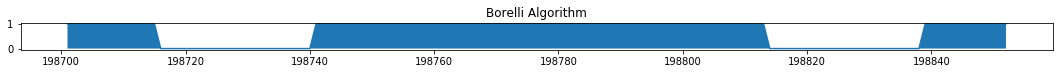

In [129]:
epidemic_period(stop_date=198901, start_date=198701)

In [63]:
interact(epidemic_period,start_date=(198701,198901,100), stop_date=(199001,199201,100))

interactive(children=(IntSlider(value=198801, description='start_date', max=198901, min=198701, step=100), Int…

<function __main__.epidemic_period(start_date, stop_date)>

In [22]:
#Sentinelles Change Points 
sentiweb_change_points=[198503,198514,198602,198612,198704,198709,198809,198815,198846,198902,198948,199006,199106,199110,199149,199206,199303,199313,199346,199401,199511,199518,199547,199602,199648,199705,199806,199817,199901,199911,199949,200006,200050,200107,200201,200208,200305,200315,200345,200401,200503,200512,200604,200613,200703,200709,200802,200810,200851,200908,200937,200952,201051,201107,201205,201212,201251,201311,201405,201409,201503,201511,201604,201614,201650,201705,201750,201810,201903,201908]                                                                                                                                                                                                                                                                                           
                       
len(sentiweb_change_points)

70

In [23]:
#Plotting Sentinelles Change Points
def sentiweb_epidemic_period (start_date,stop_date): 
    vec_change_points=np.zeros(1820)
    for i in range (0,35) : 
        vec_change_points[int(sentiweb_inv_change_points[2*i]):int(sentiweb_inv_change_points[2*i+1])]=1 
    absc_selected=absc[inv_bij_change_point(start_date):inv_bij_change_point(stop_date)]
    vec_change_points_selected=vec_change_points[inv_bij_change_point(start_date):inv_bij_change_point(stop_date)]
    ax_k=plt.plot(absc_selected,vec_change_points_selected)
    fig = plt.gcf()
    plt.title("Sentinelle Algorithm")
    plt.fill_between(absc_selected, 0, vec_change_points_selected)
    fig.set_size_inches(18.5, 0.5)

In [25]:
#Constructing a vector : "198501",...,"201952"
absc_1=[]
for a in range(198500,202000,100):
    for t in range (1,53):
        absc_1.append(a+t)
for i in range (0,len(absc_1)):
    absc_1[i]=str(absc_1[i])
absc_1

['198501',
 '198502',
 '198503',
 '198504',
 '198505',
 '198506',
 '198507',
 '198508',
 '198509',
 '198510',
 '198511',
 '198512',
 '198513',
 '198514',
 '198515',
 '198516',
 '198517',
 '198518',
 '198519',
 '198520',
 '198521',
 '198522',
 '198523',
 '198524',
 '198525',
 '198526',
 '198527',
 '198528',
 '198529',
 '198530',
 '198531',
 '198532',
 '198533',
 '198534',
 '198535',
 '198536',
 '198537',
 '198538',
 '198539',
 '198540',
 '198541',
 '198542',
 '198543',
 '198544',
 '198545',
 '198546',
 '198547',
 '198548',
 '198549',
 '198550',
 '198551',
 '198552',
 '198601',
 '198602',
 '198603',
 '198604',
 '198605',
 '198606',
 '198607',
 '198608',
 '198609',
 '198610',
 '198611',
 '198612',
 '198613',
 '198614',
 '198615',
 '198616',
 '198617',
 '198618',
 '198619',
 '198620',
 '198621',
 '198622',
 '198623',
 '198624',
 '198625',
 '198626',
 '198627',
 '198628',
 '198629',
 '198630',
 '198631',
 '198632',
 '198633',
 '198634',
 '198635',
 '198636',
 '198637',
 '198638',
 '198639',

In [30]:
#Sentinelles Change Points in the format 1,...,1820 where for instance 387 is the 387th week from the year 1985
sentiweb_inv_change_points=np.zeros(len(sentiweb_change_points))
for i in range(0,len(sentiweb_change_points)):
    sentiweb_inv_change_points[i]=int(inv_bij_change_point(sentiweb_change_points[i]))
sentiweb_inv_change_points

array([   2.,   13.,   53.,   63.,  107.,  112.,  164.,  170.,  201.,
        209.,  255.,  265.,  317.,  321.,  360.,  369.,  418.,  428.,
        461.,  468.,  530.,  537.,  566.,  573.,  619.,  628.,  681.,
        692.,  728.,  738.,  776.,  785.,  829.,  838.,  884.,  891.,
        940.,  950.,  980.,  988., 1042., 1051., 1095., 1104., 1146.,
       1152., 1197., 1205., 1246., 1255., 1284., 1299., 1350., 1358.,
       1408., 1415., 1454., 1466., 1512., 1516., 1562., 1570., 1615.,
       1625., 1661., 1668., 1713., 1725., 1770., 1775.])

In [43]:
#Plotting our change points and the sentinelles change points in the same figure
def algos_epidemic_period (start_date,stop_date): 
    
    vec_change_points=np.zeros(1820)
    vec_change_points[0:result13R[0]]=1 
    for i in range (0,34) : 
        vec_change_points[result13R[2*i+1]-1:result13R[2*i+2]-1]=1 
    absc_selected=absc_1[inv_bij_change_point(start_date):inv_bij_change_point(stop_date)]
    for i in range (0,len(absc_selected)):
        absc_selected[i]=str(absc_selected[i])
    vec_change_points_selected=vec_change_points[inv_bij_change_point(start_date):inv_bij_change_point(stop_date)]
    ax_k=plt.plot(absc_selected,vec_change_points_selected,label="Borelli")
    fig = plt.gcf()
    fig.legend()
    plt.fill_between(absc_selected, 0, vec_change_points_selected)
    fig.set_size_inches(18.5, 0.5)
    
    
    vec_change_points_f=np.zeros(1820)
    for i in range (0,35) : 
        vec_change_points_f[int(sentiweb_inv_change_points[2*i]):int(sentiweb_inv_change_points[2*i+1])]=1 
    absc_selected_f=absc_1[inv_bij_change_point(start_date):inv_bij_change_point(stop_date)]
    for i in range(0,len(absc_selected_f)):
        absc_selected_f[i]=str(absc_selected_f[i])
    vec_change_points_selected_f=vec_change_points_f[inv_bij_change_point(start_date):inv_bij_change_point(stop_date)]
    ax_k_f=plt.plot(absc_selected_f,vec_change_points_selected_f,label="Sentinelle")
    fig_f = plt.gcf()
    fig_f.legend()
    plt.fill_between(absc_selected_f, 0, vec_change_points_selected_f)
    fig_f.set_size_inches(18.5, 0.5)
    
    lio=[]
    for year in range (start_date-1,stop_date-1,100) :
        for t in range (1,53) :
            lio.append(entropy(year+t))

    ax_v_f=plt.plot(np.linspace(1,((stop_date-start_date)/100)*52,((stop_date-start_date)/100)*52),lio,label="Entropy")
    fig_v = plt.gcf()
    fig_v.set_size_inches(18.5, 2.5)
    fig_v.legend()
    plt.show()

In [44]:
#Plotting our change points between the start_date and the stop_date : 
interact(algos_epidemic_period,start_date=(198501,201101,100), stop_date=(199701,201901,100))

interactive(children=(IntSlider(value=199801, description='start_date', max=201101, min=198501, step=100), Int…

<function __main__.algos_epidemic_period(start_date, stop_date)>

In [97]:
#Amount of time between when our algo detects an epidemic and the sentinelles algo detects the same epidemic
def distance_epidemic_detection (epidemic_algo_1,epidemic_algo_2) : 
    dist_1=np.array(epidemic_algo_1)-np.array(epidemic_algo_2)
    dist_2=dist_1*dist_1
    dist_3=np.zeros(35)
    for i in range (0,35):
        dist_3[i]=dist_2[2*i]
    return dist_3

In [98]:
#Amount of time between when our algo detects an epidemic and the sentinelles algo detects the same epidemic
distance_epidemic_detection(result13R,sentiweb_inv_change_points)

array([169., 289., 169.,  36., 196., 225.,  64., 225., 144.,  81., 100.,
        81., 256., 196., 144.,  81., 256., 121., 225., 225., 169., 225.,
        81., 169., 196., 441., 100., 144., 256.,  64., 169., 100.,  81.,
       289., 100.])

In [93]:
# Let's calculate the area under the curve of each epidemic period

sum_incidence_region=np.zeros(1820)
for i in range (0,1820):
    sum_incidence_region[i]=sum(flu_regional_final[i])

area_under_curve=np.zeros(35)

for i in range (0,35) : 
    area_under_curve[i]=sum(sum_incidence_region[int(sentiweb_inv_change_points[2*i]):int(sentiweb_inv_change_points[2*i+1])])
    

area_curve_ratio=np.zeros(35)
    
for j in range (0,35) : 
    area_curve_ratio[j]=area_under_curve[j]/max(area_under_curve)  


area_curve_ratio

array([0.66573711, 0.55465342, 0.26711293, 0.28871271, 1.        ,
       0.92802542, 0.1316223 , 0.34160471, 0.38324953, 0.68151896,
       0.2299781 , 0.63319246, 0.64555634, 0.47843415, 0.5512478 ,
       0.62174785, 0.21341272, 0.33212203, 0.24635839, 0.45611253,
       0.53221458, 0.27035198, 0.35470895, 0.37670975, 0.55269766,
       0.64685813, 0.42196995, 0.23972607, 0.63304439, 0.12395965,
       0.55875621, 0.40465188, 0.30364315, 0.41724404, 0.2941543 ])

In [94]:
# Let's calculate the pic of each epidemic period

pic_epidemic=np.zeros(35)

for i in range (0,35) : 
    pic_epidemic[i]=max(sum_incidence_region[int(sentiweb_inv_change_points[2*i]):int(sentiweb_inv_change_points[2*i+1])])
    

pic_epidemic_ratio=np.zeros(35)
   
for j in range (0,35) : 
    pic_epidemic_ratio[j]=pic_epidemic[j]/max(pic_epidemic)  
    

pic_epidemic_ratio

array([0.42787266, 0.41068284, 0.29725801, 0.31453168, 1.        ,
       0.86734494, 0.18548229, 0.2801241 , 0.26528216, 0.90921542,
       0.25885345, 0.88389189, 0.64725941, 0.28417699, 0.39145261,
       0.53310786, 0.18475557, 0.36584957, 0.19892668, 0.47119658,
       0.45333594, 0.21561338, 0.43446907, 0.3317774 , 0.55222629,
       0.46328647, 0.31204405, 0.25337507, 0.42750929, 0.16767756,
       0.47007854, 0.27990049, 0.24082511, 0.2406015 , 0.37647092])

Text(0, 0.5, 'Area Under Epidemic Curve')

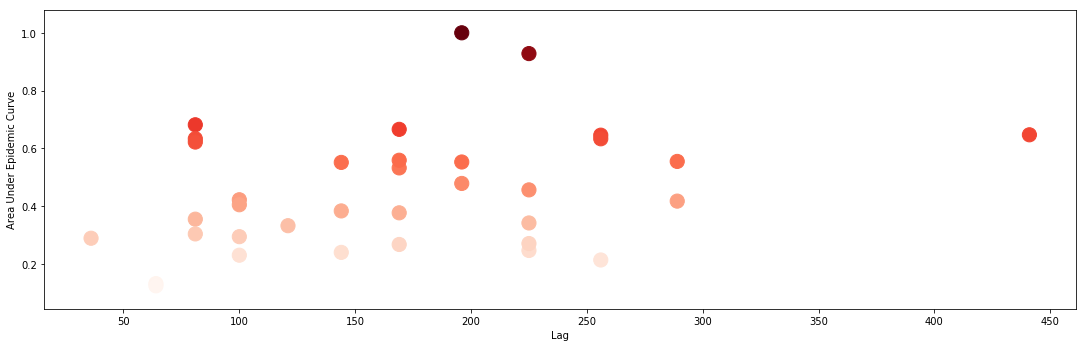

In [117]:
#Plot the "Area under the curve of the epidemic period" against "the amount of time between 
#the dectection of the epidemic by our algo and the detection of the epidemic by Sentinelles algo"

plt.scatter(distance_epidemic_detection(result13R,sentiweb_inv_change_points),area_curve_ratio,c=area_curve_ratio, s=200,cmap='Reds')
fig_f = plt.gcf()
fig_f.set_size_inches(18.5, 5.5)
plt.xlabel("Lag")
plt.ylabel("Area Under Epidemic Curve")

Text(0, 0.5, 'Pic of the Epidemic Curve')

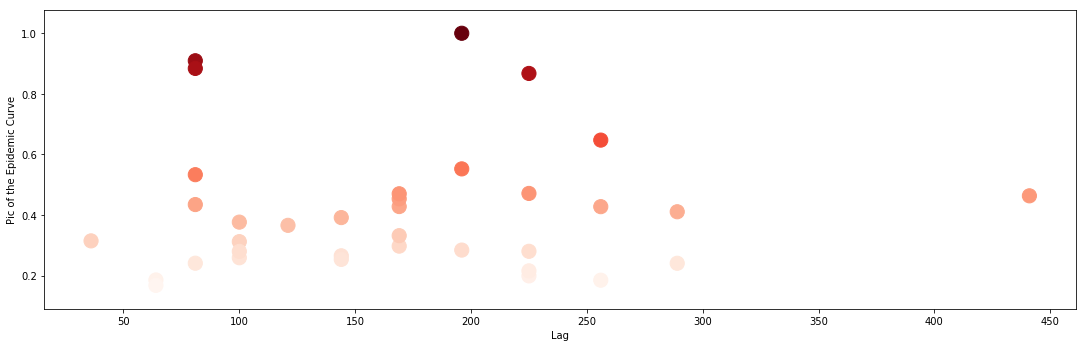

In [119]:
#Plot the "Pic of the epidemic period" against "the amount of time between 
#the dectection of the epidemic by our algo and the detection of the epidemic by Sentinelles algo"

plt.scatter(distance_epidemic_detection(result13R,sentiweb_inv_change_points),pic_epidemic_ratio,c=pic_epidemic_ratio, s=200,cmap='Reds')
fig_f = plt.gcf()
fig_f.set_size_inches(18.5, 5.5)
plt.xlabel("Lag")
plt.ylabel("Pic of the Epidemic Curve")

## Let's calculate the Entropy :

In [33]:
flu_regional_bis=pd.read_csv("/Users/aaronmamann/Desktop/epidemics/data/incidence-Grippaux_Regions.csv",index_col=["week","geo_name"])

In [78]:
#Creating the neighbours regions of each region, for instance "ALSACE_N" is the neighbours regions of ALSACE
ALSACE_N =["LORRAINE","FRANCHE-COMTE"]
AQUITAINE_N =["MIDI-PYRENEES","LIMOUSIN","POITOU-CHARENTES"] 
AUVERGNE_N =["LANGUEDOC-ROUSSILLON","MIDI-PYRENEES","LIMOUSIN","CENTRE","BOURGOGNE","RHONE-ALPES"]                       
BASSE_NORMANDIE_N =["HAUTE-NORMANDIE","CENTRE","PAYS-DE-LA-LOIRE","BRETAGNE"]         
BOURGOGNE_N =["FRANCHE-COMTE","RHONE-ALPES","AUVERGNE","CENTRE","ILE-DE-FRANCE","CHAMPAGNE-ARDENNE"]                     
BRETAGNE_N =["BASSE-NORMANDIE","PAYS-DE-LA-LOIRE"]                      
CENTRE_N =["POITOU-CHARENTES","PAYS-DE-LA-LOIRE","BASSE-NORMANDIE","HAUTE-NORMANDIE","ILE-DE-FRANCE","BOURGOGNE","AUVERGNE","LIMOUSIN"]                        
CHAMPAGNE_ARDENNE_N =["LORRAINE","FRANCHE-COMTE","BOURGOGNE","ILE-DE-FRANCE","PICARDIE","NORD-PAS-DE-CALAIS"]             
CORSE_N =["PROVENCE-ALPES-COTE-D-AZUR"]                         
FRANCHE_COMTE_N =["RHONE-ALPES","BOURGOGNE","CHAMPAGNE-ARDENNE","LORRAINE","ALSACE"]                 
HAUTE_NORMANDIE_N =["PICARDIE","ILE-DE-FRANCE","CENTRE","BASSE-NORMANDIE"]                
LANGUEDOC_ROUSSILLON_N =["PROVENCE-ALPES-COTE-D-AZUR","RHONE-ALPES","AUVERGNE","MIDI-PYRENEES"]          
LIMOUSIN_N =["POITOU-CHARENTES","AQUITAINE","MIDI-PYRENEES","AUVERGNE","CENTRE"]                      
LORRAINE_N =["ALSACE","FRANCHE-COMTE","CHAMPAGNE-ARDENNE"]                      
MIDI_PYRENEES_N =["LANGUEDOC-ROUSSILLON","AUVERGNE","LIMOUSIN","AQUITAINE"]                 
NORD_PAS_CALAIS_N =["CHAMPAGNE-ARDENNE","PICARDIE"]            
PAYS_DE_LA_LOIRE_N =["POITOU-CHARENTES","CENTRE","BASSE-NORMANDIE","BRETAGNE"]              
PICARDIE_N =["NORD-PAS-DE-CALAIS","HAUTE-NORMANDIE","ILE-DE-FRANCE","CHAMPAGNE-ARDENNE"]                      
POITOU_CHARENTES_N =["AQUITAINE","LIMOUSIN","CENTRE","PAYS-DE-LA-LOIRE"]              
PROVENCE_ALPES_COTE_D_AZUR_N =["RHONE-ALPES","LANGUEDOC-ROUSSILLON","CORSE"]    
ILE_DE_FRANCE_N =["PICARDIE","HAUTE-NORMANDIE","CENTRE","BOURGOGNE","CHAMPAGNE-ARDENNE"]                 
RHONE_ALPES_N =["PROVENCE-ALPES-COTE-D-AZUR","LANGUEDOC-ROUSSILLON","AUVERGNE","BOURGOGNE","FRANCHE-COMTE"]                   

In [34]:
# Defining the function which sums the number of new infections of all the 22 french regions at a given week

regions_fr=["ALSACE","AQUITAINE","AUVERGNE","BASSE-NORMANDIE","BOURGOGNE","BRETAGNE","CENTRE","CHAMPAGNE-ARDENNE","CORSE","FRANCHE-COMTE","HAUTE-NORMANDIE","LANGUEDOC-ROUSSILLON","LIMOUSIN","LORRAINE","MIDI-PYRENEES","NORD-PAS-DE-CALAIS","PAYS-DE-LA-LOIRE","PICARDIE","POITOU-CHARENTES","PROVENCE-ALPES-COTE-D-AZUR","ILE-DE-FRANCE","RHONE-ALPES"]

def total_infection (week): 
    
    tot=0
    for i in regions_fr : 
        tot=tot+flu_regional_bis['inc100'][week,i]
    return tot


In [35]:
# Defining the entropy at a given week 

def entropy (week) : 
    
    entropy_fr=0
    
    h=0
    prob_infection=np.zeros(22)
    for i in regions_fr : 
        prob_infection[h]=flu_regional_bis['inc100'][week,i]/total_infection(week)
        h=h+1
            
    log_prob_infection=np.zeros(22)
    for i in range(0,22) : 
        if prob_infection[i] != 0 : 
            log_prob_infection[i]=log(prob_infection[i])

        
    entropy_fr=-sum(np.array(prob_infection)*np.array(log_prob_infection))
    return entropy_fr

In [37]:
# Calculating the entropy for each week between the date_down and the date_up

def entr_ffi (date_up, date_down): 

    date_up=np.int(date_up)
    date_down=np.int(date_down)
    lio=[]
    for year in range (date_down-1,date_up-1,100) :
        for t in range (1,53) :
            lio.append(entropy(year+t))

    plt.plot(np.linspace(1,((date_up-date_down)/100)*52,((date_up-date_down)/100)*52),lio)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 2.5)
    plt.show()

In [31]:
# Displaying the plot of entropy between the date_down and the date_up 
interact(entr_ffi,date_down=(198501,198901,100), date_up=(200101,201001,100))

interactive(children=(IntSlider(value=200501, description='date_up', max=201001, min=200101, step=100), IntSli…

<function __main__.entr_ffi(date_up, date_down)>

In [38]:
# Displaying our change points and the plot of entropy  

def borelli_algo (date_up, date_down): 
    flu_regional_final=np.zeros((np.int(((date_up-date_down)/100)*52),22))
    i=0
    for year in range (date_down-1,date_up-1,100) :
        for t in range (1,53) :
            flu_regional_final[i]=flu_regional_met['inc100'][year+t].to_numpy()
            i=i+1
    algo13R = rpt.Pelt(model="rbf").fit(flu_regional_final)
    result13R = algo13R.predict(pen=3)
    rpt.display(flu_regional_final, result13R, figsize=(20, 50))
    plt.show()
    
    lio=[]
    for year in range (date_down-1,date_up-1,100) :
        for t in range (1,53) :
            lio.append(entropy(year+t))

    plt.plot(np.linspace(1,((date_up-date_down)/100)*52,((date_up-date_down)/100)*52),lio)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 2.5)
    plt.show()
    

In [36]:
# Displaying our change points and the plot of entropy between the date_down and the date_up 

interact(borelli_algo,date_down=(198701,198901,100), date_up=(199001,199201,100))


interactive(children=(IntSlider(value=199101, description='date_up', max=199201, min=199001, step=100), IntSli…

<function __main__.borelli_algo(date_up, date_down)>